In [121]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, '/global/u2/h/hyunohy/URAP/regressiononly/functions')
sys.path.insert(0, '/global/u2/h/hyunohy/URAP/regressiononly/training')
sys.path.insert(0, '/global/u2/h/hyunohy/URAP/17deg_data')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
from Clusterer import *
from plotting import *
from data_functions import *

In [123]:
root_file = "17deg_data/reco_pi+_45GeV_theta_17-17deg_pi+_140516_99.edm4hep.root"
label ="reco_140516_99_Linear"
detector_name = "HcalEndcapPHitsReco" #or "HcalEndcapPInsertHitsReco"
sampling_fraction = 0.02 #or 0.0098

NEvents_Max = 1_000_000 #OK if tree has less events than this
#NEvents_Max = 100
Energy_Bins = binning=np.linspace(0,110,20) #Plotting
n_calo_layers = 10

take_log10 = False
do_normalization = False
if (take_log10):
    Energy_Bins = np.logspace(1,110,21)

Do_Processing = True
Do_Training = True
#saves to path/numpy_file. Only needs to be run frist time. 
# Change to False for messing with plots

In [124]:
if Do_Processing:
    
    Clusterer = Strawman_Clusterer(root_file, label, detector_name, sampling_fraction, NEvents_Max, n_calo_layers,take_log=take_log10, normalization = do_normalization)
    Clusterer.run_segmentation_clusterer()

    del Clusterer
#Ignore: " DeprecationWarning: `np.str` "

Loaded 6000 Events
min 1.0006531


/global/homes/h/hyunohy/.local/perlmutter/3.9-anaconda-2021.11/lib/python3.9/site-packages/awkward0/array/base.py:622: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(where, (cls.numpy.ndarray, AwkwardArray)) and issubclass(where.dtype.type, (numpy.str, numpy.str_)):
/global/homes/h/hyunohy/.local/perlmutter/3.9-anaconda-2021.11/lib/python3.9/site-packages/awkward0/array/base.py:624: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20

Getting Cell Z information
Doing Cluster Sum for z-bin 0...
Doing Cluster Sum for z-bin 1...
Doing Cluster Sum for z-bin 2...
Doing Cluster Sum for z-bin 3...
Doing Cluster Sum for z-bin 4...
Doing Cluster Sum for z-bin 5...
Doing Cluster Sum for z-bin 6...
Doing Cluster Sum for z-bin 7...
Doing Cluster Sum for z-bin 8...
Doing Cluster Sum for z-bin 9...
[[3.64990236e-03 5.68237305e-03 5.69458010e-03 ... 1.86749269e-01
  8.90624995e-02 3.27270510e-02]
 [1.65527340e-02 1.28173826e-04 4.27246094e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.32836920e-03 6.41479496e-03 7.57446282e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.20434573e-03 3.83300782e-03 3.52172853e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.46972658e-02 2.37188723e-01 6.95257578e-01 ... 1.00720215e-01
  3.63037109e-02 4.22546386e-02]
 [1.28540038e-02 1.33734130e-01 1.04577027e+00 ... 8.21777329e-02
  8.83544923e-02 3.14880370e-02]]
Cluster Sum(s) Done!
(6000,) CUTS
Before Cu

In [125]:
ClusterSum = load_ClusterSum(label)
segmented_ClusterSum = load_segmented_ClusterSum(label)
GenP = load_GenP(label)

Plotting QA Distributions...
N Z bins = 10


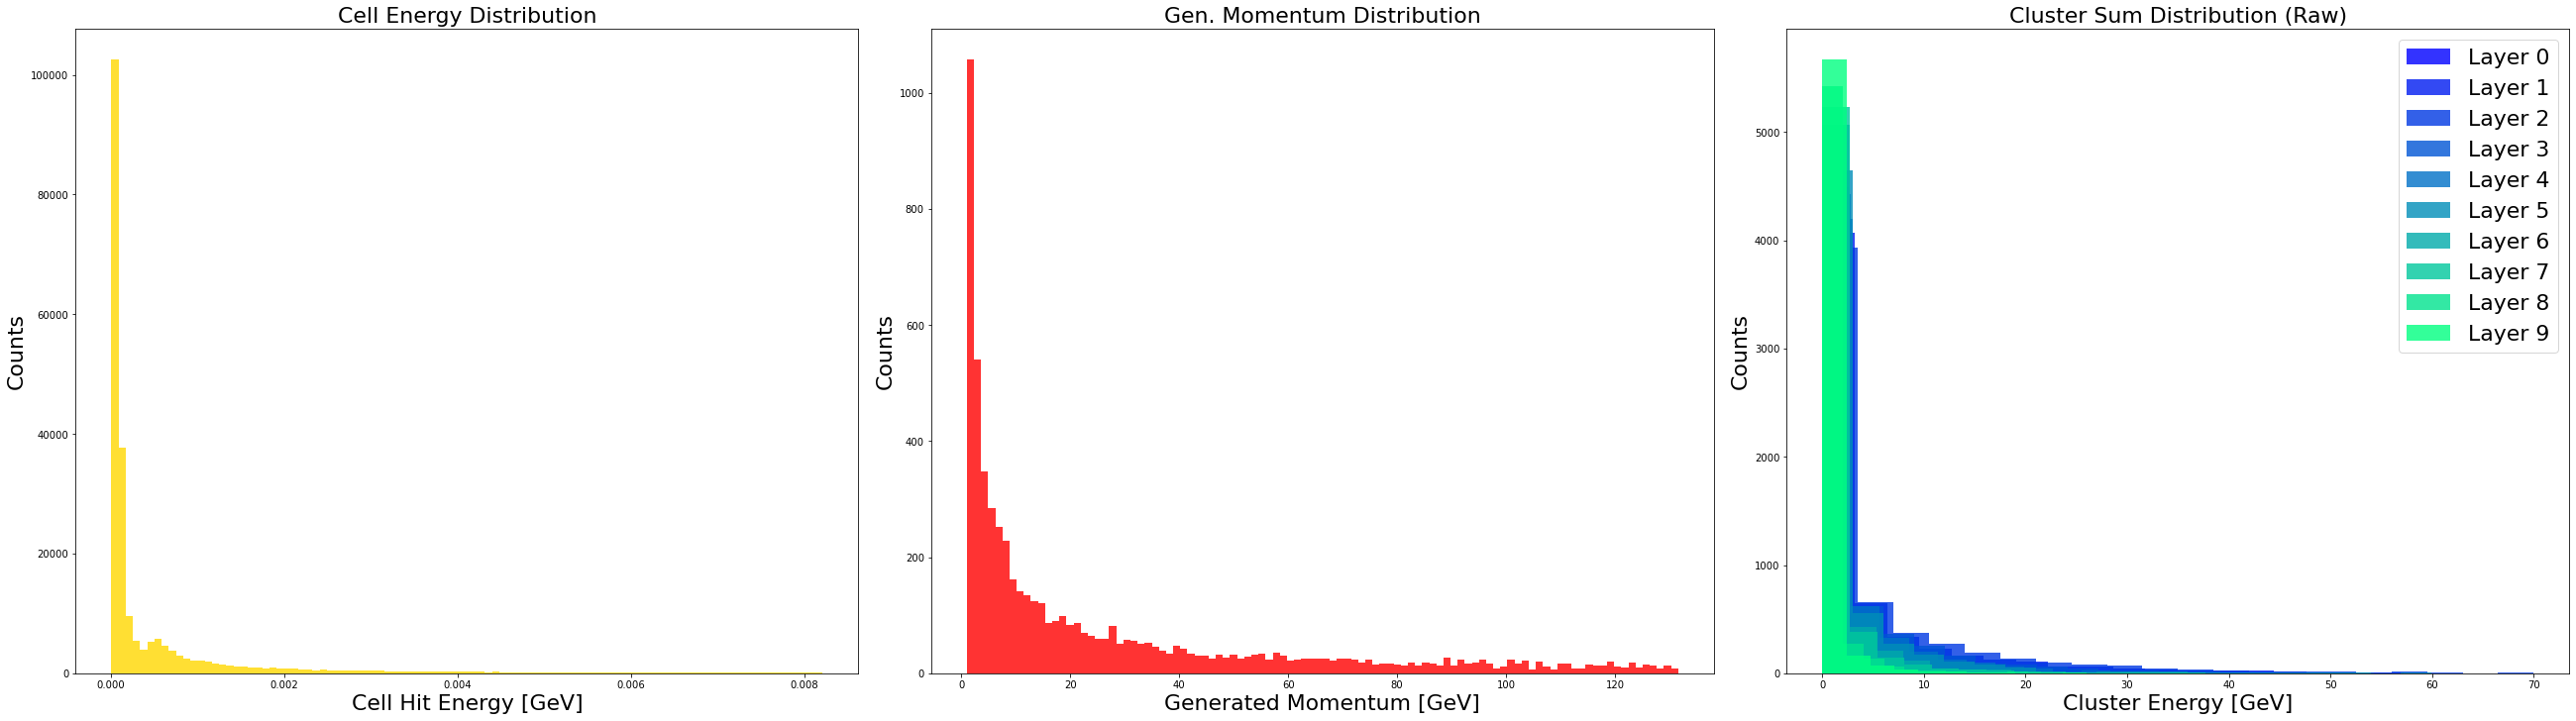

In [126]:
flat_hits_e = load_flat_hits_e(label)
energy_QA_plots(flat_hits_e, GenP, segmented_ClusterSum, label)

In [127]:
max(ClusterSum)

150.80566306351102

In [128]:
max(GenP)

131.60977

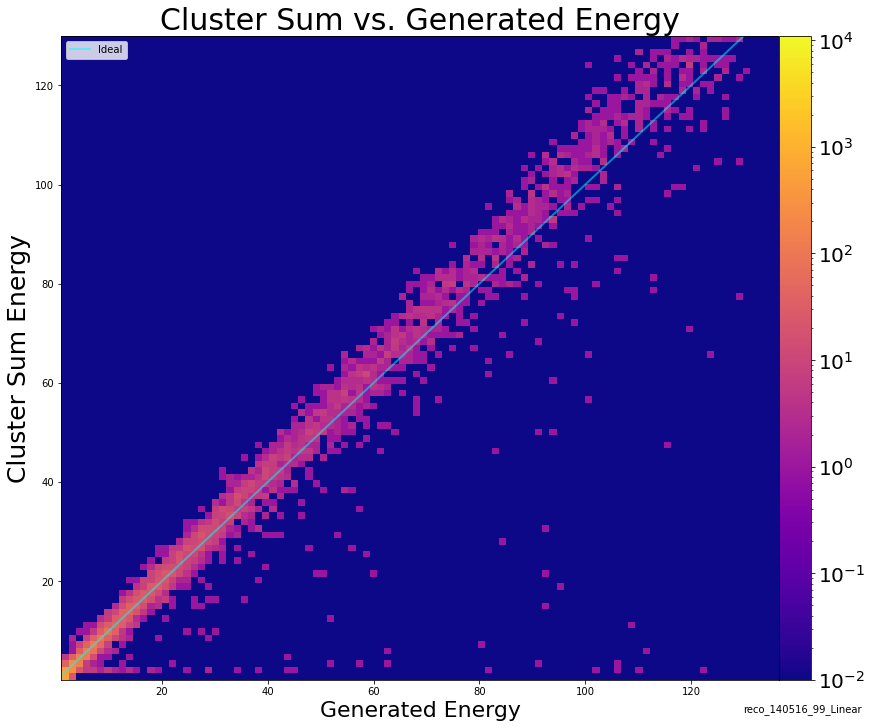

In [129]:
ClusterSum_vs_GenP(ClusterSum, GenP, label)

In [130]:
segmented_ClusterSum

array([[1.82495118e-01, 2.84118652e-01, 2.84729005e-01, ...,
        9.33746344e+00, 4.45312498e+00, 1.63635255e+00],
       [8.27636701e-01, 6.40869130e-03, 2.13623047e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.66418460e-01, 3.20739748e-01, 3.78723141e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.60217287e-01, 1.91650391e-01, 1.76086427e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.34863288e-01, 1.18594362e+01, 3.47628789e+01, ...,
        5.03601075e+00, 1.81518554e+00, 2.11273193e+00],
       [6.42700192e-01, 6.68670652e+00, 5.22885134e+01, ...,
        4.10888664e+00, 4.41772462e+00, 1.57440185e+00]])

(array([3377.,  876.,  488.,  310.,  276.,  205.,  164.,  155.,  116.,
          33.]),
 array([1.06506344e-01, 1.51764220e+01, 3.02463377e+01, 4.53162534e+01,
        6.03861690e+01, 7.54560847e+01, 9.05260004e+01, 1.05595916e+02,
        1.20665832e+02, 1.35735747e+02, 1.50805663e+02]),
 <BarContainer object of 10 artists>)

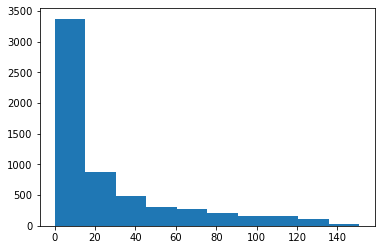

In [131]:
plt.hist(ClusterSum)

In [132]:
from NN_Regression import *

In [133]:
NN_Regression = NN_Regressor(label,n_calo_layers)

In [134]:
if (Do_Training):
    NN_Regression.run_NN_regression() 

Loading Segmented Cluster Sum, shape = (6000, 10)
Nevents =  6000
Nevents =  6000
Epoch 1/400
3/3 [==============================] - 1s 71ms/step - loss: 25.4400 - val_loss: 24.5986 - lr: 0.0010
Epoch 2/400
3/3 [==============================] - 0s 27ms/step - loss: 24.4486 - val_loss: 23.5747 - lr: 0.0010
Epoch 3/400
3/3 [==============================] - 0s 31ms/step - loss: 23.3712 - val_loss: 22.3488 - lr: 0.0010
Epoch 4/400
3/3 [==============================] - 0s 30ms/step - loss: 22.0580 - val_loss: 20.7577 - lr: 0.0010
Epoch 5/400
3/3 [==============================] - 0s 29ms/step - loss: 20.2745 - val_loss: 18.6309 - lr: 0.0010
Epoch 6/400
3/3 [==============================] - 0s 29ms/step - loss: 17.8876 - val_loss: 15.7507 - lr: 0.0010
Epoch 7/400
3/3 [==============================] - 0s 30ms/step - loss: 14.7032 - val_loss: 11.8380 - lr: 0.0010
Epoch 8/400
3/3 [==============================] - 0s 29ms/step - loss: 10.4640 - val_loss: 6.9282 - lr: 0.0010
Epoch 9/400
3/3

In [135]:
x_test = np.load(f"./{label}/x_test.npy")
y_test = np.load(f"./{label}/y_test.npy")
preds = np.load(f"./{label}/predictions.npy")
loss = np.load(f"./{label}/loss.npy")
val_loss = np.load(f"./{label}/val_loss.npy")

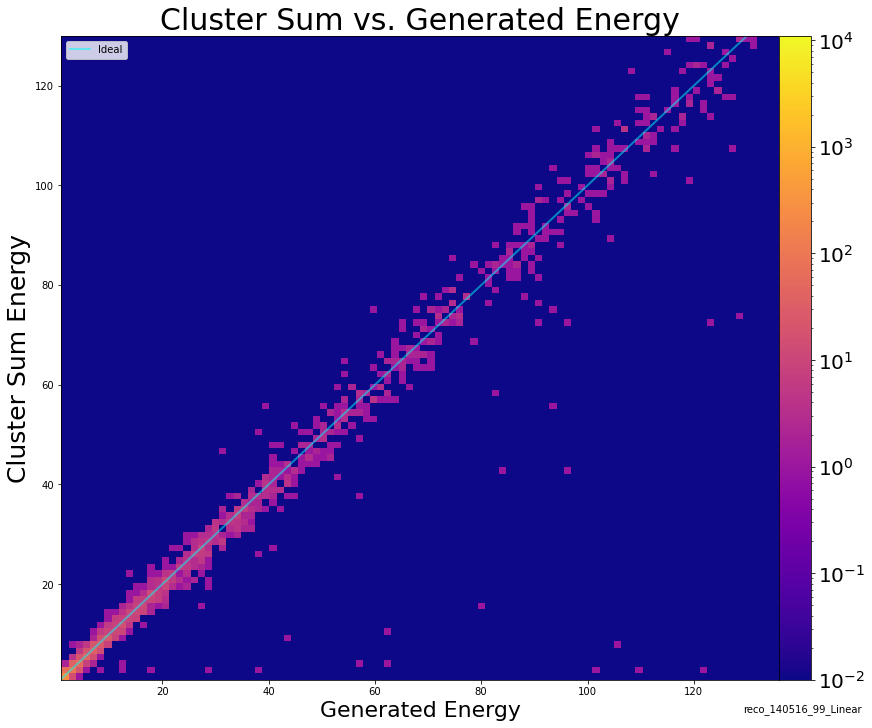

In [136]:
ClusterSum_vs_GenP(preds[:,0],y_test,label)

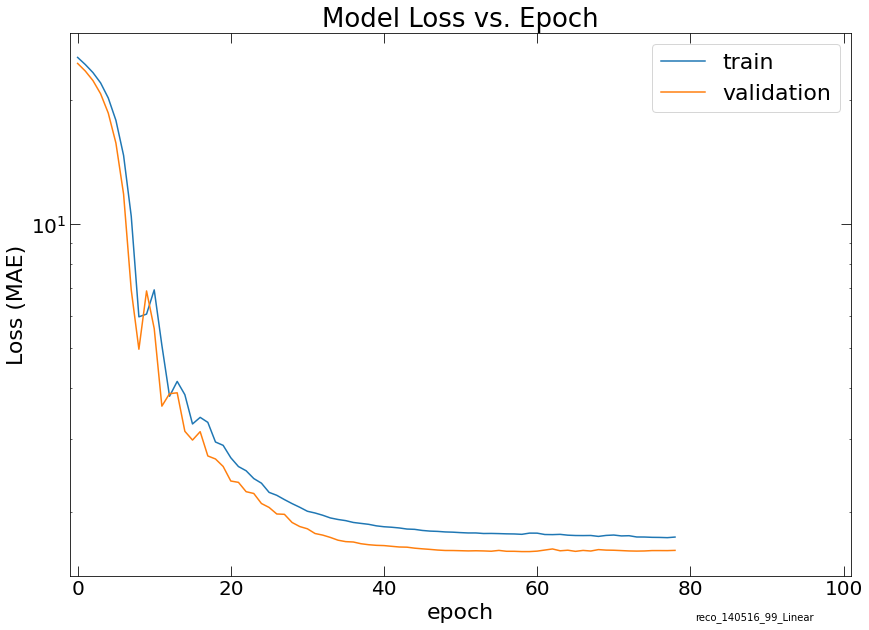

In [137]:
Plot_Loss_Curve(loss,val_loss,label,loss_string="MAE") #label loss yourself here

In [138]:
simple_sum = x_test
if len(np.shape(x_test))>1:
    simple_sum = np.sum(x_test,axis=-1)

NN = get_res_scale(y_test,preds,Energy_Bins,label) #Label here will save. Make sure not to save strawman!
strawman = get_res_scale(y_test,simple_sum,Energy_Bins)

NN_in_RecoBins = get_res_scale_in_reco_bins(y_test,preds,simple_sum,Energy_Bins,label)
strawman_in_RecoBins = get_res_scale_in_reco_bins(y_test,simple_sum,simple_sum,Energy_Bins)

print(NN.keys())
print(NN_in_RecoBins.keys())

dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])
dict_keys(['avg_reco', 'avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


In [139]:
NN["resolution"]

array([0.54573256, 0.24933854, 0.18472644, 0.14086626, 0.13832556,
       0.10758241, 0.16260978, 0.143513  , 0.06267868, 0.16976422,
       0.22395119, 0.06501632, 0.06339821, 0.19100314, 0.12891121,
       0.07170581, 0.24490851, 0.18582588, 0.23623382, 0.18278614])

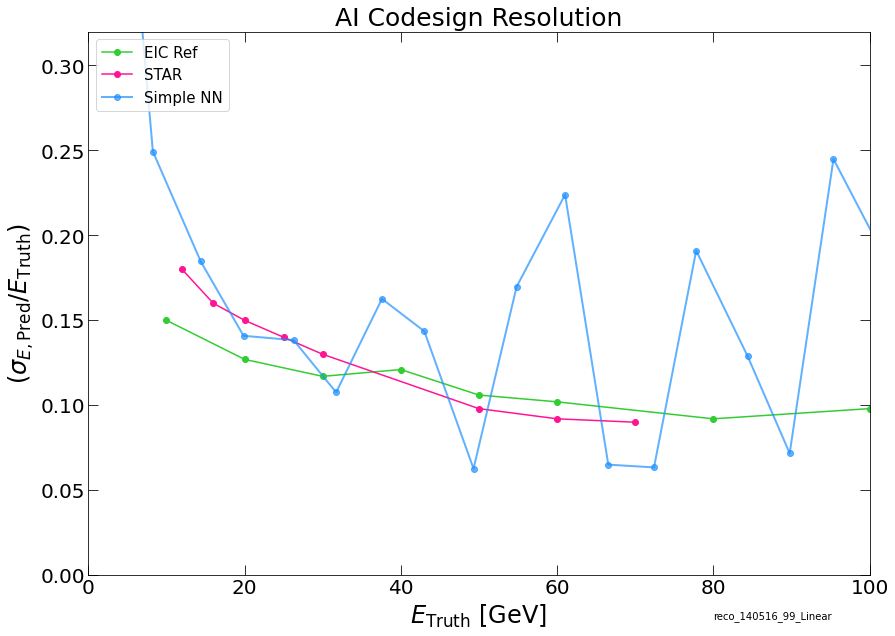

In [140]:
Plot_Resolutions(NN,strawman,label)

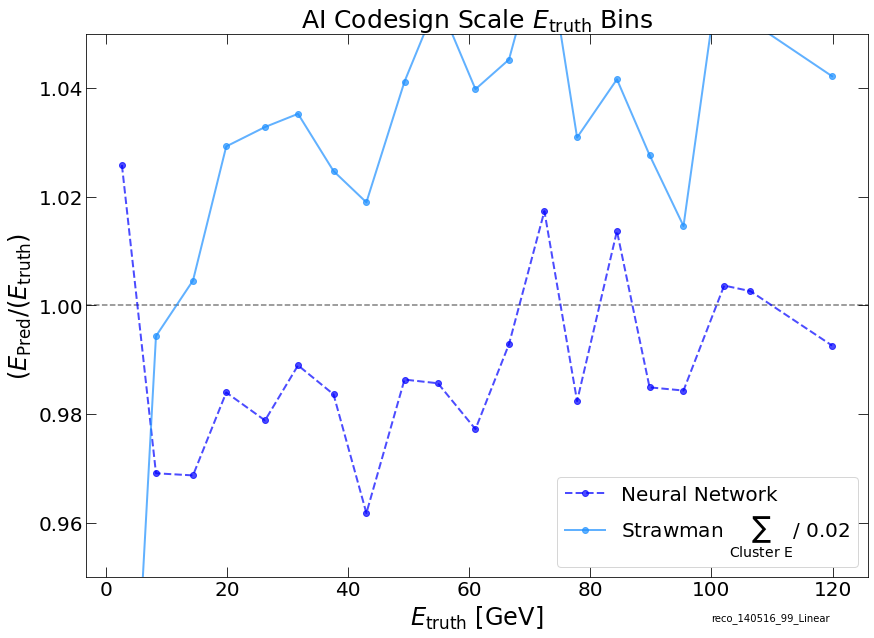

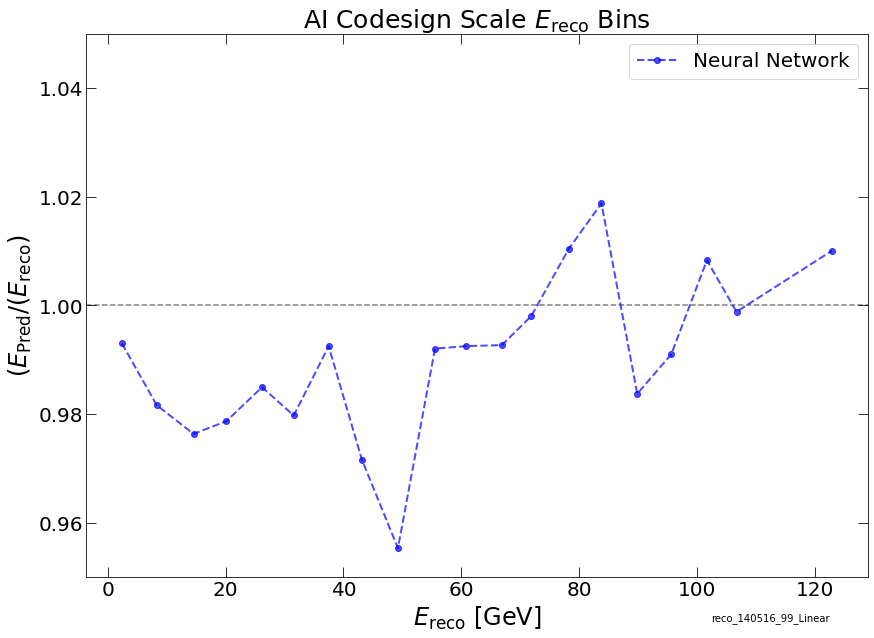

In [141]:
Plot_Energy_Scale(NN,label,sampling_fraction,strawman)
Plot_Energy_Scale(NN_in_RecoBins,label,sampling_fraction,None,"reco")

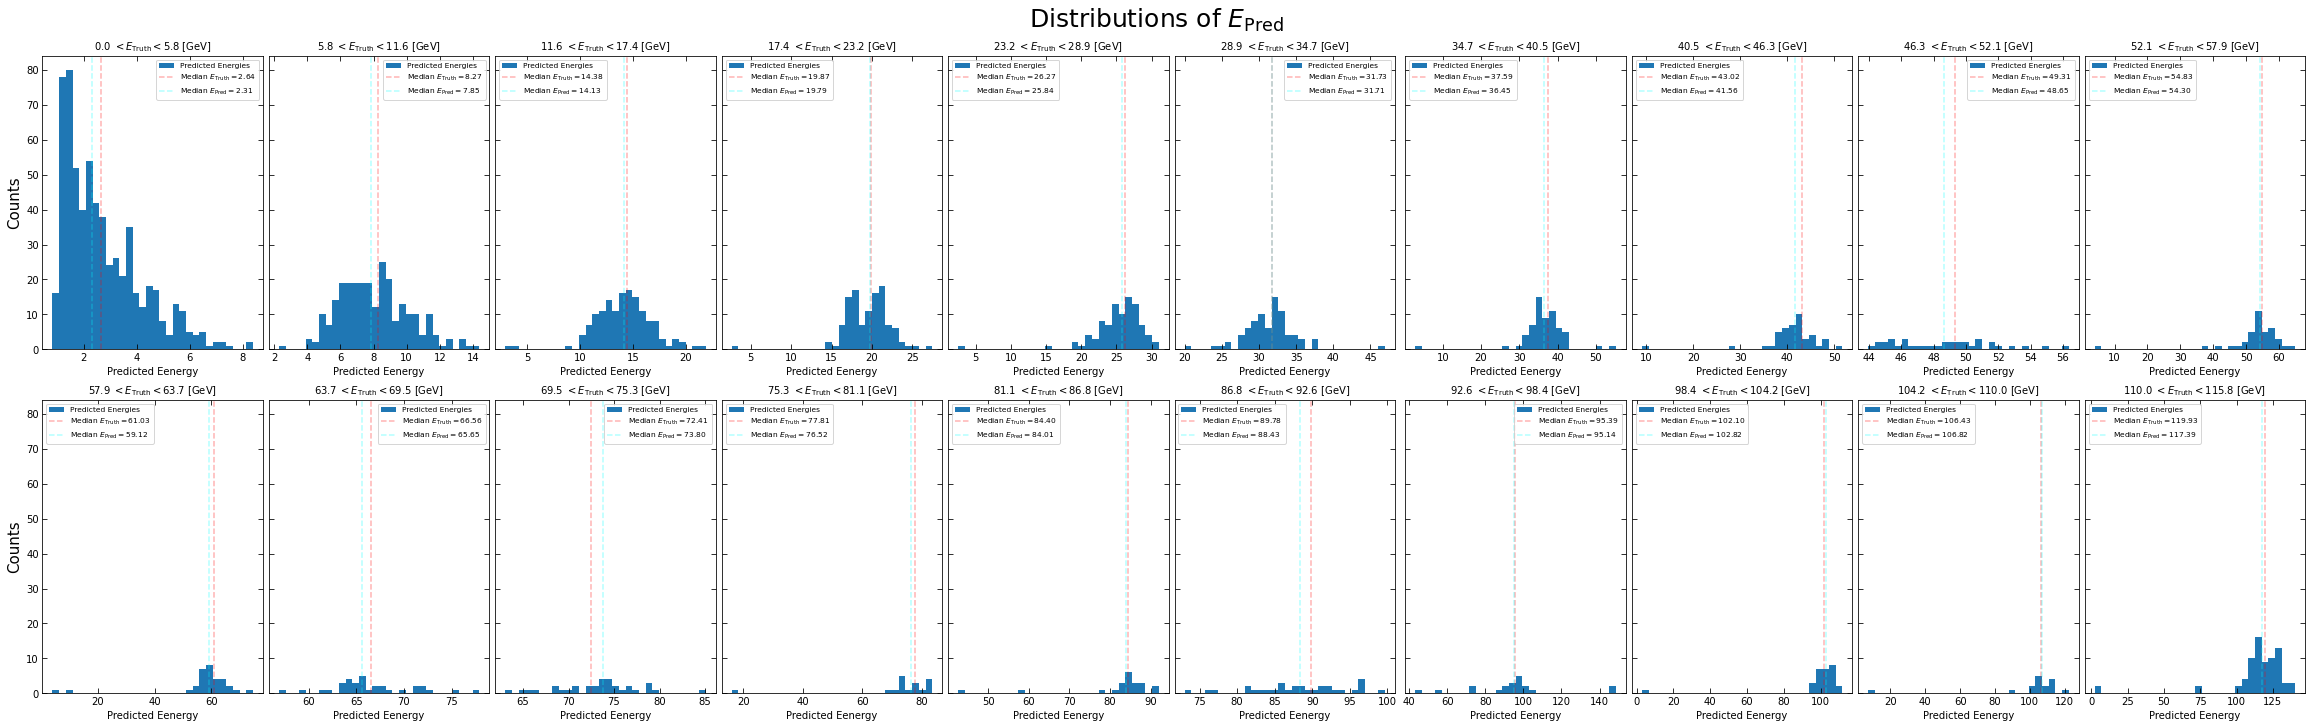

In [142]:
plot_slices(NN["slices"],NN['avg_truth'],label,Energy_Bins,"Truth",)

In [ ]:
plot_slices(NN["scale_array"],NN['avg_truth'],label, Energy_Bins,"Truth",scale=True)